# Volume 3: Pandas 2 (Plotting)
    <Name> Jean PHilip L Juachon
    <Class>
    <Date> 08/21/2019

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

# Problem 1
Create 3 visualizations for the data in *final_accidents2.pickle* and *final_drivers.pickle*. 
Make one of the visualizations a histogram and one visualization a scatter matrix.
The visualizations should be well labeled and easy to understand.
Include a short description of your plots.

In [3]:
accidents = pd.read_pickle("final_accidents2.pickle")
drivers = pd.read_pickle("final_drivers.pickle")

In [4]:
accidents.head()

,ST_CASE,STATE,LATITUDE,LONGITUD,HOUR,DAY,MONTH,YEAR,DRUNK_DR,WEATHER,SP,FATALS
0,10001,1,32.641064,-85.354692,4,15,1,2010,1,1,0,1
1,10002,1,31.430447,-86.956694,6,11,1,2010,0,1,0,1
2,10003,1,30.691631,-88.085778,15,14,1,2010,0,1,1,1
3,10004,1,33.868700,-86.291164,1,21,1,2010,0,2,0,1
4,10005,1,33.309742,-86.787222,6,4,1,2010,0,1,0,1


In [5]:
drivers.head()

,ST_CASE,VEH_NO,AGE,DRINKING,SPEEDREL,YEAR
0,10001,1,51,9,0,2010
2,10002,1,44,0,0,2010
3,10003,1,27,9,1,2010
4,10003,2,45,0,0,2010
5,10003,3,28,0,0,2010


This viz shows that there is one improper value in the data as someone's age reached 999


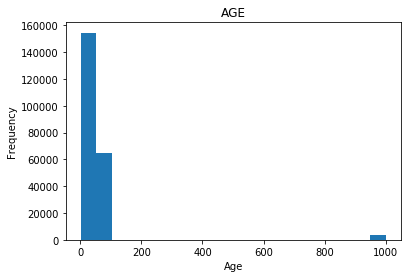

In [6]:
#driver_plot = drivers.plot(kind = "hist", y = ["AGE"], alpha = 0.5, bins = 25)
drivers[["AGE"]].hist(grid=False, bins=20)
plt.xlabel("Age")
plt.ylabel("Frequency")
print("This viz shows that there is one improper value in the data as someone's age reached 999")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000279805BF358>,
      dtype=object)

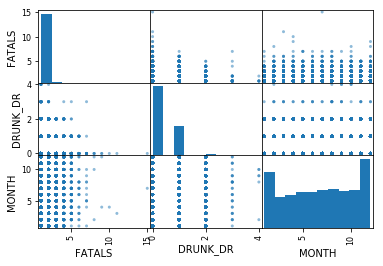

In [13]:
#pd.plotting.scatter_matrix(accidents[["DRUNK_DR", "MONTH", "FATALS"]])
total_fatals = accidents["FATALS"].sum()
total_drunk = accidents["DRUNK_DR"].sum()
pd.plotting.scatter_matrix(accidents[["FATALS", "DRUNK_DR", "MONTH"]])

The viz shows the trend on the number of deaths per year, it can be seen that it peaked at Year 2012


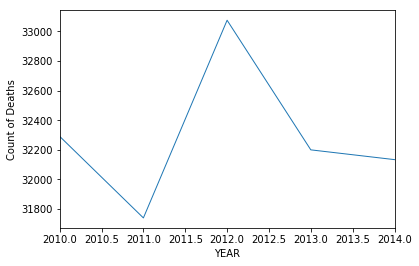

In [12]:
a = accidents["fatal_year_sum"] =accidents.groupby(["YEAR"])["FATALS"].sum()
plt.ylabel("Count of Deaths")
a.plot(linewidth = 1)
print("The viz shows the trend on the number of deaths per year, it can be seen that it peaked at Year 2012")

# Problem 2
Using the accident data from the previous problem, identify if a trend exists between FATALS and the following variables:
1. WEATHER
2. DRINKING
3. SP

Support each claim with a clear, labeled visualization and a short description of how the visualization supports your claim.

In [63]:
drivers.columns

Index(['ST_CASE', 'VEH_NO', 'AGE', 'DRINKING', 'SPEEDREL', 'YEAR'], dtype='object')

The highest count of accident occured during the clear weather, however, if we disregard it (due to clear weather occuring most of the time naturally), 
we can see that most fatalities happen on a cloudy day

In [66]:
drunk_drivers = drivers.query("DRINKING == 1 & AGE < 99")

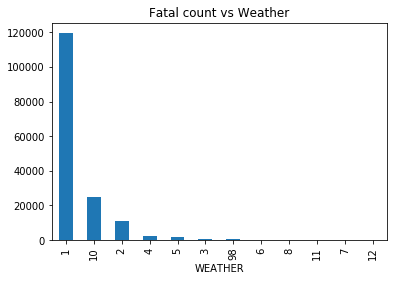

In [68]:
df_1 = accidents[["WEATHER","FATALS"]]
df_1 = df_1.groupby('WEATHER')['FATALS'].sum().sort_values(ascending = False)
df_1.plot.bar(title = "Fatal count vs Weather")
plt.show()

Type 1 weather accounts to all fatalities

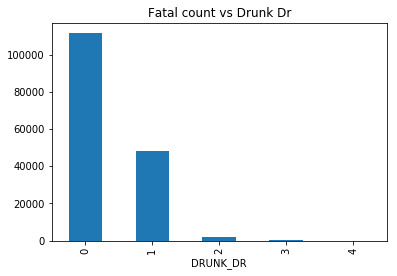

Fatalities is highest for not drunk related accidents


In [69]:
df_1 = accidents[["DRUNK_DR","FATALS"]]
df_1 = df_1.groupby('DRUNK_DR')['FATALS'].sum().sort_values(ascending = False)
df_1.plot.bar(title = "Fatal count vs Drunk Dr")
plt.show()
print("Fatalities is highest for not drunk related accidents")

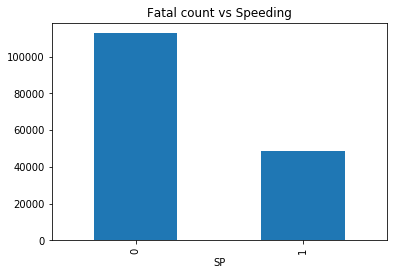

Fatalities mostly occur to non-overspeeding related


In [71]:
df_1 = accidents[["SP","FATALS"]]
df_1 = df_1.groupby('SP')['FATALS'].sum().sort_values(ascending = False)
df_1.plot.bar(title = "Fatal count vs Speeding")
plt.show()
print("Fatalities mostly occur to non-overspeeding related")

# Problem 3
Using the same data, display a distributional visualization, and provide a brief description and analysis on the following distributions: 

1. The distribution of accidents across the United States
2. The distribution of age in all accidents
3. The distribution of fatalities by the hour which the accident occurs

As usual, all plots should be labeled and easy to read.

Text(0.5, 0, 'LONGITUDE')

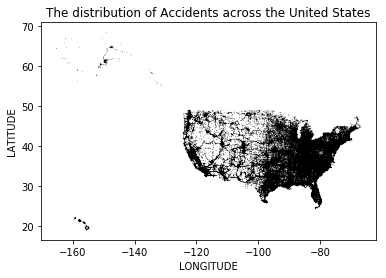

In [49]:
''''''
accidents.plot(kind = "scatter", x= "LONGITUD", y = "LATITUDE", color = "black", s = 0.005)
plt.title("The distribution of Accidents across the United States")
plt.xlabel("LONGITUDE")

The plot shows that the accidents are distributed along the United States as the collection of data points resemble a map of the US

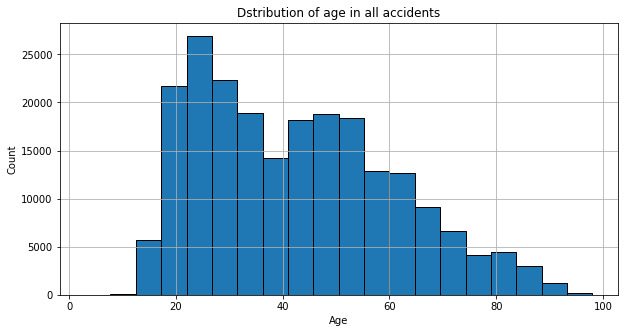

Majority is between 20-30 years old


In [74]:
drunkDrivers = drivers.query("AGE < 99")
df_plot = drunkDrivers["AGE"].hist(bins=20,figsize = (10,5),ec='black')
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Dstribution of age in all accidents")
plt.show()
print("Majority is between 20-30 years old")

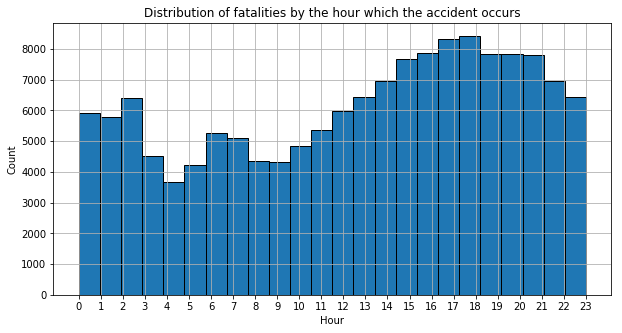

Fatalities occur often night time: 6PM - 9PM


In [76]:
df_plot = accidents["HOUR"].hist(bins=24,figsize = (10,5),ec='black')
plt.xlabel("Hour")
plt.ylabel("Count")
plt.title("Distribution of fatalities by the hour which the accident occurs")
plt.xticks(np.arange(0,24))
plt.show()
print("Fatalities occur often night time: 6PM - 9PM")

## Problem 4
The *pydataset* module contains numerous data sets, each stored as a pandas DataFrame.
Read data on road accident deaths in the United States using the data set *road* in the *pydataset* module.
Using this data, answer the following questions:

1. Does higher population density indicate higher fuel consumption?

2. Does a correlation exist between number of drivers and number of deaths in a state?

3. Does the temperature of a state in January affect its population density?

Support each claim with a visualization and make sure the visualizations are clearly labelled and easy to understand.
Include any citations provided by the data set.

(Hint: Consider how outliers may be skewing the data.)

In [32]:
from pydataset import data
road = data("road")
road.head()

,deaths,drivers,popden,rural,temp,fuel
Alabama,968,158,64.0,66.0,62,119.0
Alaska,43,11,0.4,5.9,30,6.2
Arizona,588,91,12.0,33.0,64,65.0
Arkanas,640,92,34.0,73.0,51,74.0
Calif,4743,952,100.0,118.0,65,105.0


In [58]:
road['fuel_pop'] = road.fuel/road.popden
print("DC pop den value is very large")
road.query('index == "DC"')

DC pop den value is very large


,deaths,drivers,popden,rural,temp,fuel,fuel_pop
DC,115,35,12524.0,0.0,44,23.0,0.001836


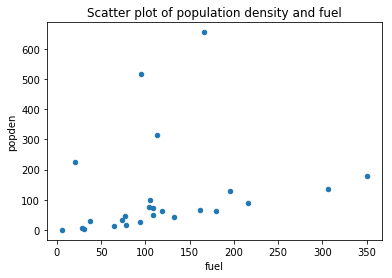

Taking into account most of the sample, there is a positive correlation, 
higher popden has higher fuel consumption.


In [59]:
road_1 = road.query('index != "DC"')

df_plot = road_1.plot.scatter(x= "fuel", y="popden")
plt.title("Scatter plot of population density and fuel")
plt.show()
print("There is a positive correlation, \nhigher popden has higher fuel consumption.")

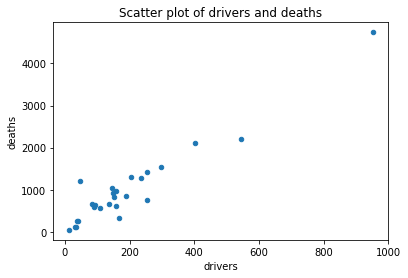

There is a positive correlation, more drivers translates to more deaths


In [60]:
df_plot = road.plot.scatter(x= "drivers", y="deaths")
plt.title("Scatter plot of drivers and deaths")
plt.show()
print("There is a positive correlation, more drivers translates to more deaths")

## Problem 5
The file *new_york_crime_clean.csv* contains data on New York City crimes and felonies from 2000-2017 taken from https://www1.nyc.gov/site/nypd/stats/crime-statistics/historical.page.
Use this data to answer the following questions and give visualizations supporting each claim:

1. What are the most common and least common crimes?

2. Does a trend exist between robbery and drug felonies? If so, what is the trend?

3. Which crimes have had the largest distributions?

Use a different style of visualization for each question. 
Make sure that each plot is well labelled and contains citations.

(Hint: Use plt.axis('scaled') or plt.axis('square') to make sure x- and y-axis are the same.)

In [20]:
crime = pd.read_csv("new_york_crime_clean.csv")
crime.head()

,OFFENSE,MURDER & NON-NEGL. MANSLAUGHTER,RAPE,ROBBERY,FELONY ASSAULT,BURGLARY,GRAND LARCENY,GRAND LARCENY OF MOTOR VEHICLE,FELONY POSSESSION OF STOLEN PROPERTY,FORGERY/THEFT_FRAUD/IDENTITY THEFT,ARSON,FELONY SEX CRIMES (3),FELONY DANGEROUS DRUGS (1),FELONY DANGEROUS WEAPONS (2),FEL. CRIMINAL MISCHIEF & RELATED OFFENSES,OTHER FELONIES (4)
0,2000,673,2068,32562,25924,38352,49631,35442,2194,5714,3189,1839,38088,2958,12934,13945
1,2001,649,1981,28202,23453,32763,46329,29531,2114,5594,2681,1831,30743,3030,16026,13059
2,2002,587,2144,27229,21147,31275,45771,26656,1976,5859,1902,1513,29692,2804,13291,13956
3,2003,597,2070,25989,19139,29110,46751,23413,1545,8112,1492,1295,24076,2511,8400,13786
4,2004,570,1905,24373,18622,26976,48763,20884,1358,12984,1789,1263,25824,2987,8074,12454


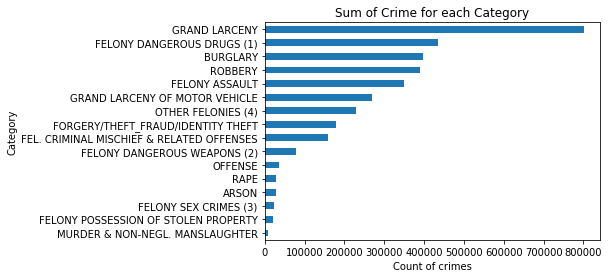

In [28]:
sumOfCrime = np.sum(crime).sort_values(ascending = True)
sumOfCrime.plot(kind = "barh", y = sumOfCrime)
plt.xlabel("Count of crimes")
plt.ylabel("Category")
plt.title("Sum of Crime for each Category")
plt.show()

The most common crime is Grand Larceny

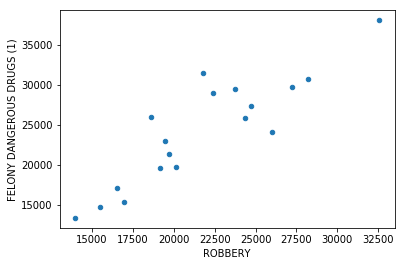

In [26]:
crime.plot(kind = "scatter", x = "ROBBERY", y = "FELONY DANGEROUS DRUGS (1)")
plt.title("The trend/correlation between Robbery and Drug Felony")

It can be seen that there is an increasing trend and relationship between the two.

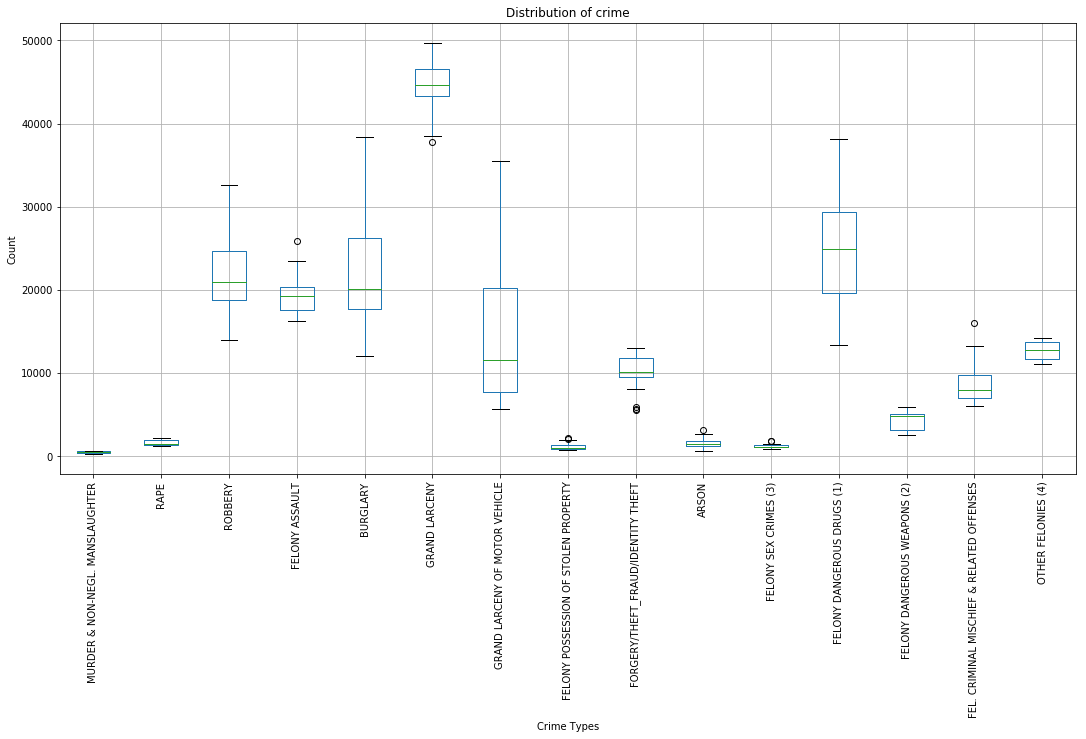

In [56]:
# Create a boxplot to show distribution of each crime type
crime.boxplot(column = (crime.columns[1:]).to_list(),figsize = (15,10)) 
plt.xticks(rotation = 90)
plt.tight_layout()
plt.title("Distribution of crime")
plt.xlabel("Crime Types")
plt.ylabel("Count")
plt.show()